<a href="https://colab.research.google.com/github/andresvillamayor/ML_Imagenes/blob/main/segmentacion_imagen_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# conexion al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# librerias
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt
import cv2

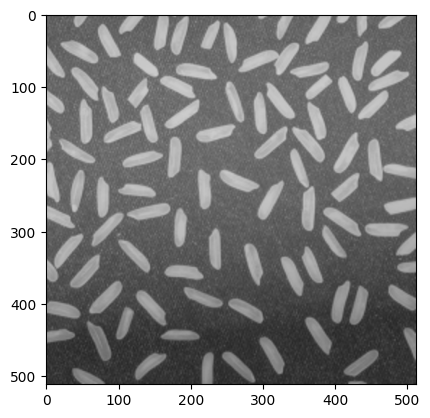

In [8]:
# Leer y mostrar la imagen
imagen = imread('/content/drive/MyDrive/Imagenes_ML/datos/rices.png')
plt.imshow(imagen)
plt.show()

In [10]:
# Funcion de datos de la imagen
def howis(imagen):
  print('size = ',imagen.shape) # tamaño de la imagen
  print('max  = ',np.max(imagen)) # maximo valor de la imagen
  print('min  = ',np.min(imagen)) # minimo valor de la imagen

howis(imagen)

size =  (512, 512, 3)
max  =  207
min  =  38


size =  (512, 512)
max  =  207
min  =  38


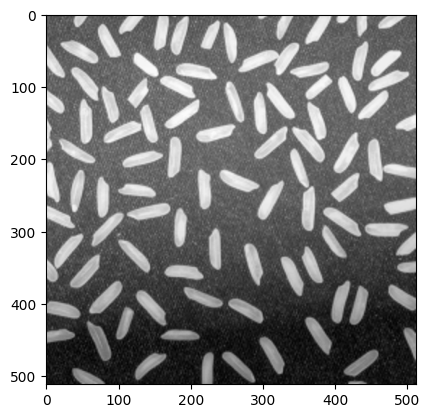

In [11]:
# Ver los valores de la imagen
x = imagen[:,:,0] # sacar los canales
howis (x)
plt.imshow(x,cmap = 'gray')
plt.show()

In [15]:
# Funcion de segmentacion
def segmenta(x,t):
  (N,M) = x.shape
  y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if x[i,j] > t:
        y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return y

area =  55395


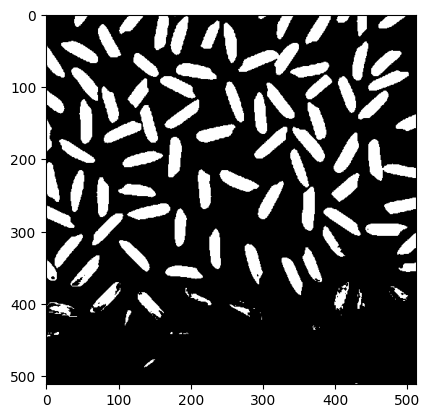

In [19]:
# Segmentacion
# prueba de threshold
# 90 - 184158
# 110 - 97141
# 130 - 68447
# 150 - 55395
y = segmenta(x,150)
plt.imshow(y,cmap= 'gray')
plt.show()

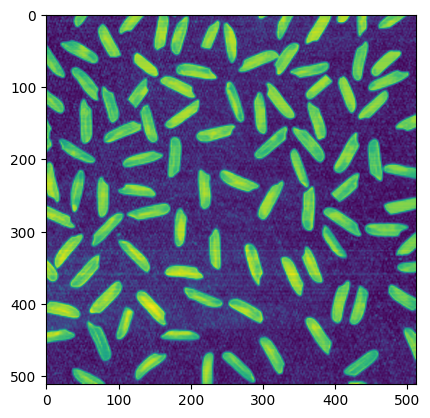

In [25]:
# Definicion de imagen con fondo homogeneo
# Crear una matriz para que el fondo sea homogeneo y así poder ver mejor la segmentacion
(N,M) = x.shape
xm = np.zeros((N,M),np.uint8)
for i in range(N):
  xmin = np.min(x[i,:])
  xm[i,:] = x[i,:] - xmin
#plt.imshow(xm,cmap ='gray')
plt.imshow(xm)
plt.show()

area =  68445


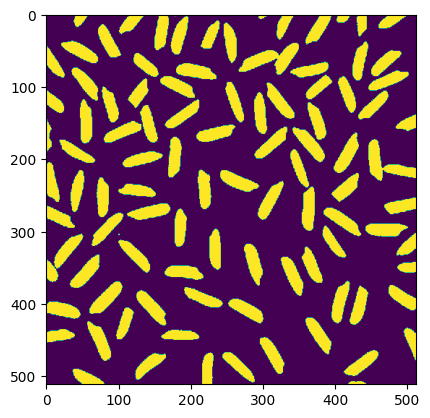

In [29]:
# Ejecutando la Segmentacion nuevamente
y = segmenta(xm,60)
plt.imshow(y)
plt.show()
# si bien se tiene una mejor resolucion hay todavia algun que otro en la imagen